In [1]:
import pandas as pd   #to import the required library of python
import numpy as np
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
df = pd.read_csv("House_Rent_Dataset.csv")

In [3]:
df

,Rent,Size
0,27500,1000
1,16000,850
2,12000,400
3,75000,2400
4,20000,1200
...,...,...
1737,22000,1100
1738,11500,1100
1739,23000,1000
1740,19000,800


Text(0.5, 1.0, 'size wise rent ')

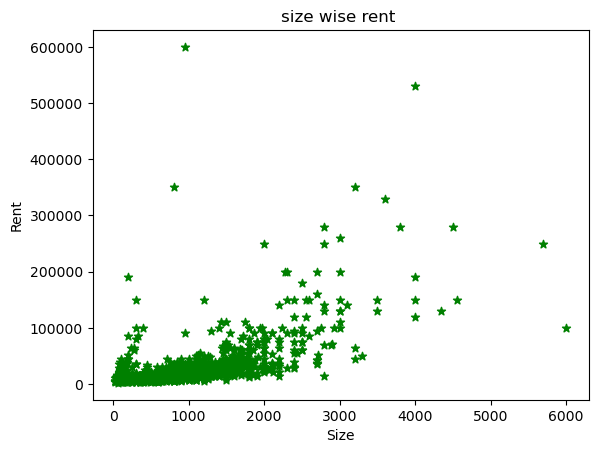

In [4]:
plt.scatter(df.Size, df.Rent , marker = "*", color= "green" )
plt.ylabel('Rent')
plt.xlabel('Size')
plt.title('size wise rent ')

In [5]:
from sklearn.linear_model import LinearRegression #to import linear regression model
reg= LinearRegression() #to create object for Linear Regression
from sklearn.model_selection import train_test_split as tts #to import splitting data model from library
x =df[['Size']] #to define x and y
y= df[['Rent']]

In [6]:
xtrain, xtest, ytrain, ytest = tts(x,y,test_size=0.33, random_state=1) #splitting data
xtest.head()

,Size
1329,778
959,700
1271,700
723,850
942,650


In [7]:
ytest.head()

,Rent
1329,10000
959,10000
1271,9000
723,18000
942,13000


In [8]:
reg.fit(xtrain,ytrain) #training model


LinearRegression()

In [9]:
m= reg.coef_        #defining coefficient and intercept
c=reg.intercept_

In [10]:
m

array([[31.43076171]])

In [11]:
c

array([-5208.12499881])

In [12]:
predicted = (m*35) + c #to predict value of y when x is 191.563495
predicted

array([[-4108.04833912]])

In [13]:
df['predicted']= reg.predict(df[['Size']]) #to show the predicted weight for height picked up randomly
df.head()

,Rent,Size,predicted
0,27500,1000,26222.636707
1,16000,850,21508.022451
2,12000,400,7364.179683
3,75000,2400,70225.703094
4,20000,1200,32508.789048


Text(0.5, 1.0, 'size wise rent')

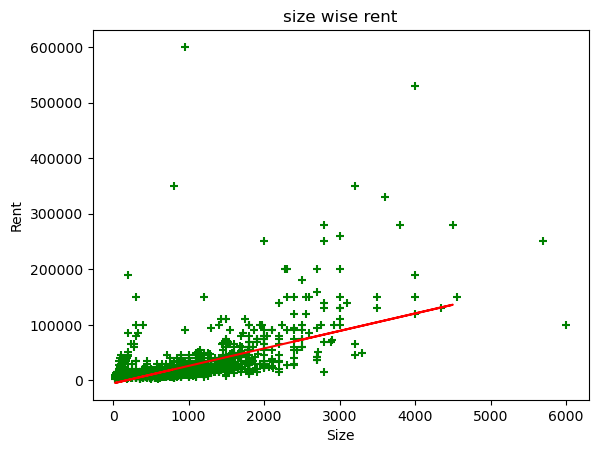

In [14]:
plt.scatter(df[['Size']], df[['Rent']], color='green', marker='+') #to draw best fit line using xtest data
plt.plot(xtest, reg.predict(xtest), color='red')
plt.ylabel('Rent')
plt.xlabel('Size')
plt.title('size wise rent')

Text(0.5, 1.0, 'size wise rent')

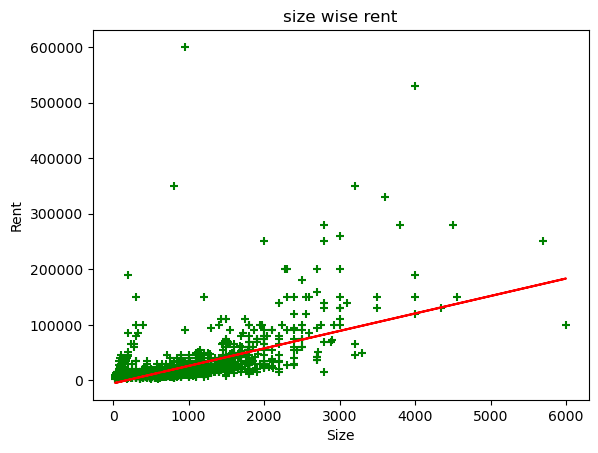

In [15]:
plt.scatter(df[['Size']], df[['Rent']], color='green', marker='+') #to draw best fit line using xtest data
plt.plot(xtrain, reg.predict(xtrain), color='red')
plt.ylabel('Rent')
plt.xlabel('Size')
plt.title('size wise rent')

In [16]:
df['error'] = df['Rent'] - df['predicted']

In [17]:
df.head()

,Rent,Size,predicted,error
0,27500,1000,26222.636707,1277.363293
1,16000,850,21508.022451,-5508.022451
2,12000,400,7364.179683,4635.820317
3,75000,2400,70225.703094,4774.296906
4,20000,1200,32508.789048,-12508.789048


In [18]:
from sklearn.metrics import mean_squared_error as MSE   #to import error model from metrics packege under sklearn library 
from sklearn.metrics import mean_absolute_error as MAE

In [19]:
test_mse= MSE(ytest, reg.predict(xtest)) #to measure test MSE
test_mse

1077167273.8824322

In [20]:
test_mae= MAE(ytest, reg.predict(xtest)) #to measure test MAE
test_mae

14016.146832801134

In [21]:
train_mse= MSE(ytrain, reg.predict(xtrain)) #to measure training MSE
train_mse

755695876.8268683

In [22]:
train_mae= MAE(ytrain, reg.predict(xtrain)) #to measure training MAE
train_mae

12887.867724783071

In [23]:
import pickle

In [24]:
pickle.dump(reg,open("model.pkl","wb"))

In [25]:
model = pickle.load(open("model.pkl","rb"))
print(model.predict([[27500]]))

[[859137.8219031]]
